<a href="https://colab.research.google.com/github/gabrieldimas/periapical-photo-caries-detection-using-cnn/blob/main/no_augment_yolo_yolo_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install roboflow torch torchvision matplotlib

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
from roboflow import Roboflow

rf = Roboflow(api_key="qGaBcdFPu8o5nVzk6TVH")
project = rf.workspace("gabriels").project("tooth-segmentation-ra8um")
model = project.version(3).model

loading Roboflow workspace...
loading Roboflow project...


In [23]:
import os
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython import get_ipython
from IPython.display import display

In [25]:
rf_caries = Roboflow(api_key="qGaBcdFPu8o5nVzk6TVH")
project_caries = rf_caries.workspace("gabriels").project("tooth-caries-detection")
model_caries = project.version(3).model

loading Roboflow workspace...
loading Roboflow project...


In [26]:
image_folder = '/content/drive/MyDrive/dataset/caries-detection/periapical'
segmented_images = []

for filename in os.listdir(image_folder):
    image_path = os.path.join(image_folder, filename)
    segmentation_result = model.predict(image_path)

    image = Image.open(image_path)

    image_np = np.array(image)
    image_cv = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)
    num_teeth = len(segmentation_result.json()['predictions'])
    caries_count = 0
    non_caries_count = 0

    for box in segmentation_result.json()['predictions']:
        x1 = int(box['x'] - box['width'] / 2)
        y1 = int(box['y'] - box['height'] / 2)
        x2 = int(box['x'] + box['width'] / 2)
        y2 = int(box['y'] + box['height'] / 2)

        tooth_image = image_cv[y1:y2, x1:x2]

        caries_result = model_caries.predict(tooth_image, confidence=40)

        if caries_result.json()['predictions']:
            caries_count += 1
            cv2.rectangle(image_cv, (x1, y1), (x2, y2), (0, 0, 255), 2)
        else:
            non_caries_count += 1
            cv2.rectangle(image_cv, (x1, y1), (x2, y2), (0, 255, 0), 2)

    segmented_images.append((image_cv, num_teeth, caries_count, non_caries_count))

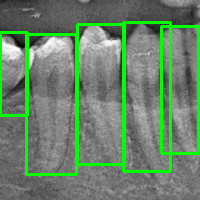

Image 1: Total Teeth: 5, Caries: 0, Non-caries: 5


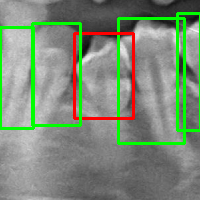

Image 2: Total Teeth: 5, Caries: 1, Non-caries: 4


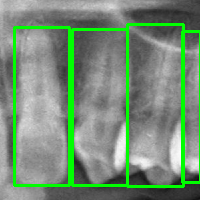

Image 3: Total Teeth: 4, Caries: 0, Non-caries: 4


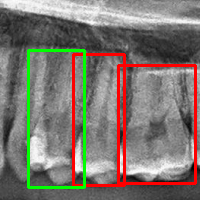

Image 4: Total Teeth: 3, Caries: 2, Non-caries: 1


In [28]:
selected_images = random.sample(segmented_images, 4)

for i, (image_cv, num_teeth, caries_count, non_caries_count) in enumerate(selected_images):
  display(Image.fromarray(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)))
  print(f"Image {i + 1}: Total Teeth: {num_teeth}, Caries: {caries_count}, Non-caries: {non_caries_count}")